## ANS 1 (Neville's method)

In [46]:
import numpy as np
import pandas as pd 
from sympy import *   
x,y,t= symbols('x,y,t')
gfg_exp = x-np.e**(-x)   
print("fuction: {}".format(gfg_exp)) 
# Use sympy.integrate() method
intr = solve(gfg_exp, x) 
print("*************************************")
print("exact solution (x): {}".format(intr))
print("*************************************")
xk=np.array([0.3,0.4,0.5,0.6])
ex=np.array([0.740818,0.670320,0.606531,0.548812])
yk=np.array([xk-ex]).T
def neville(dx, fx, x):
    """
    Finds an interpolated value using Neville's algorithm.
    Input
      dx: input x's in a list of size n
      fx: input y's in a list of size n
      x: the x value used for interpolation
    Output
      p[0]: the polynomial of degree n
    """
    n = len(dx)
    p = n*[0]
    for k in range(n):
#          Q=[]
        for i in range(n-k):
            if k == 0:
                p[i] = fx[i]
#                  Q[i].append(P[i])
#                 Q.append(P[i])
            else:
                p[i] = ((x-dx[i+k])*p[i]+ \
                        (dx[i]-x)*p[i+1])/ \
                        (dx[i]-dx[i+k])
#                 Q[i].append(P[i])
#                 Q.append(P[i])
    return p[0]
#using inverse neville's method 
val=neville(yk,xk,0)
print("********************************************************")
print(" solution using neville's method (x): {}".format(val))
print("*********************************************************")
#relative error 
rel_error=np.abs((intr-val)/intr)
print("*********************************************************************************")
print(" relative error in root value  using neville's method (x): {}".format(rel_error))
print("************************************************************************************")

        
    


fuction: x - 2.71828182845905**(-x)
*************************************
exact solution (x): [0.567143290409784]
*************************************
********************************************************
 solution using neville's method (x): [0.56714262]
*********************************************************
*********************************************************************************
 relative error in root value  using neville's method (x): [1.17586141647063e-6]
************************************************************************************


## ANS 2 (using Neville's method to plot letter)

In [47]:
'''This code performes the parametric interpolation'''
import matplotlib.pyplot as plt

t_i=np.array(np.arange(13.0)).T
x_i=np.array([[0.70,1.22,2.11,3.07,3.25,2.80,2.11,1.30,0.70,0.45,0.88,2.00,3.25]]).T
y_i=np.array([[2.25,1.77,1.61,1.75,2.30,2.76,2.91,2.76,2.25,1.37,0.56,0.08,0.25]]).T
d=np.array([np.sqrt((x_i[i+1]-x_i[i])**2+(y_i[i+1]-y_i[i])**2) for i in range(len(x_i)-1)])
P=[]
for i in range(len(x_i)):
    P.append(np.array([x_i[i],y_i[i]]))
td=np.insert(d,0,0)
T=[]
sm=0.0
for i in td:
    sm=sm+i
    T.append(sm)

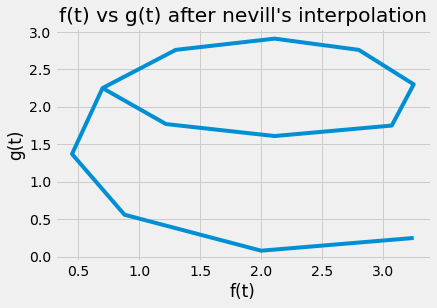

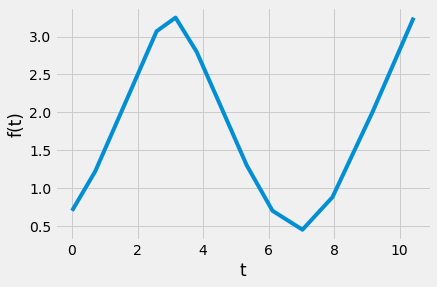

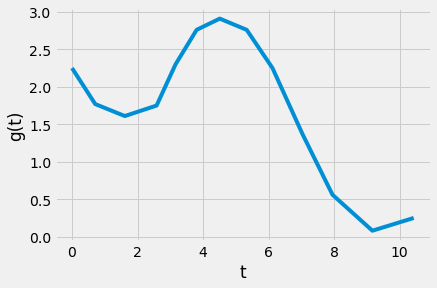

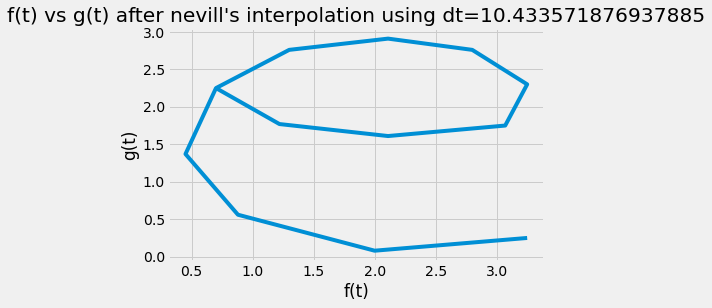

In [82]:

'''Using neville's method the polynomial is determined below an used directly in function after determination to save computation time 
The code to determine polynomial is assigned as comment below '''
# polynomial interzpolation to obtain the expression using method in Q1
# pol=neville(t_i,x_i,t)
# f_t=simplify(pol)
# g_t=simplify(neville(t_i,y_i,t))
# print(f_t)
# print(g_t)
#polynomial function obtained using interpollation 
f_t=2.65698456199395e-6*t**12 - 0.00015822512756547*t**11 + 0.00415473444680793*t**10 - 0.0633185056076744*t**9 + 0.620069427083822*t**8 - 4.07817104172379*t**7 + 18.2712302386851*t**6 - 55.3206289942773*t**5 + 109.777973964778*t**4 - 134.229872305397*t**3 + 89.5425404617241*t**2 - 23.2227118208234*t + 0.7
g_t=-4.16128610193201e-7*t**12 + 2.18650211039768e-5*t**11 - 0.000486093633347415*t**10 + 0.00586864660939139*t**9 - 0.0402283110126365*t**8 + 0.135418236516539*t**7 + 0.0482145211676575*t**6 - 2.36438089986501*t**5 + 9.50067158360882*t**4 - 17.758414662379*t**3 + 16.0353596864412*t**2 - 5.92905469360432*t + 2.25
# f_t1= 9.5907821602266e-8*t**12 - 6.82920474587141e-6*t**11 + 0.000213993147413286*t**10 - 0.00388048390652557*t**9 + 0.0450364404210759*t**8 - 0.349200396825397*t**7 + 1.83205058100015*t**6 - 6.44218945656968*t**5 + 14.7186763907261*t**4 - 20.6595078262788*t**3 + 16.1390224987976*t**2 - 4.76021500721504*t + 0.7
# g_t1=1.32984942012727e-8*t**12 - 9.29307960558016e-7*t**11 + 2.91241824661981e-5*t**10 - 0.000542500275573225*t**9 + 0.00669308517967412*t**8 - 0.0574111648478868*t**7 + 0.347371828382219*t**6 - 1.46356268601197*t**5 + 4.12010597901986*t**4 - 7.18845602403023*t**3 + 6.96079996993768*t**2 - 3.20502669552677*t + 2.25
f_val=[]
g_val=[]
for i in range (len(T)):
    f_val.append(f_t.subs(t,T[i]))
    g_val.append(g_t.subs(t,T[i]))
# print(f_val,g_val)
plt.style.use("fivethirtyeight")
plt.plot(f_val,g_val)
plt.xlabel("f(t)")
plt.ylabel("g(t)")
plt.title("f(t) vs g(t) after nevill's interpolation")
plt.show()
plt.plot(T,f_val)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show()
plt.plot(T,g_val)
plt.xlabel("t")
plt.ylabel("g(t)")
plt.show()
t_s=np.linspace(0,T[-1],2)
for i in range (len(t_s)):
    f_val.append(f_t.subs(t,t_s[i]))
    g_val.append(g_t.subs(t,t_s[i]))
plt.style.use("fivethirtyeight")
plt.plot(f_val[0:-2],g_val[0:-2])
plt.xlabel("f(t)")
plt.ylabel("g(t)")
plt.title("f(t) vs g(t) after nevill's interpolation using dt={}".format(t_s[1]-t_s[0]))
plt.show()

## ANS 3 : cubic spline code 

******************coeff of interpolant f(t)****************************
********[aj,bj,cj,dj]*********
[0.7] 0 [0.] 0
[1.22] [1.00000294] [-1.69512971e-05] [-1.08662161e-05]
[2.11] [0.99999412] [5.37108514e-05] [2.64652241e-05]
[3.07] [1.00002684] [-0.0001913] [-8.50715831e-05]
[3.25] [0.99989476] [0.00213662] [0.00431095]
[2.8] [1.00024492] [-0.00264046] [0.00353857]
[2.11] [1.00047164] [0.00733154] [-0.00481739]
[1.3] [0.99723479] [-0.02490459] [0.0132659]
[0.7] [1.01146896] [0.10715398] [-0.07336587]
[0.45] [0.96211932] [-0.66887608] [1.03470676]
[0.88] [1.10254985] [0.62228811] [1.00090247]
[2.] [1.08251702] [-1.46560394] [-0.62139644]
[3.25] [0.13800328] 5 [1.72416105]
******************coeff of interpolant g(t)****************************
********[aj,bj,cj,dj]*********
[0.7] 0 [0.] 0
[1.22] [1.00000294] [-1.69512971e-05] [-1.08662161e-05]
[2.11] [0.99999412] [5.37108514e-05] [2.64652241e-05]
[3.07] [1.00002684] [-0.0001913] [-8.50715831e-05]
[3.25] [0.99989476] [0.00213662] [0.00

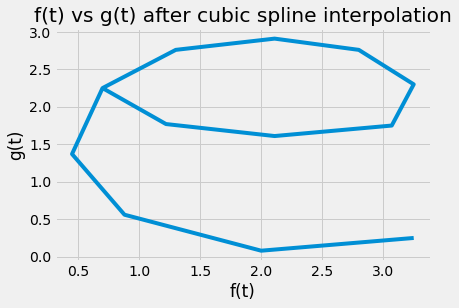

In [70]:
'''code to perform cubic spline interpolation ''' 
def Cubic_spline (t_i,x_i):
    a=x_i
    n=len(x_i)
    h_i=[]
    α_i=[]
    CF=[]
    for i in range (n-1):
        h_i.append(x_i[i+1]-x_i[i])
    for i in range (0,n-1):
        α_i.append(3*(a[i+1]-a[i])/h_i[i] - (3/h_i[i-1])*(a[i]-a[i-1]))
    l0=1
    μ0=0
    z0=0
    μ=[]
    l_i=[]
    z_i=[]
    l_i.append(l0)
    z_i.append(z0)
    μ.append(μ0)
    for i in range (1,n-1):
        l_i.append(2*(x_i[i+1]-x_i[i-1])-h_i[i-1]*μ[i-1])
        μ.append(h_i[i]/l_i[i])
        z_i.append((α_i[i]-h_i[i-1]*z_i[i-1])/l_i[i])
    #     z_i.append((α_i[i]-h_i[i-1]*z_i[i-1])/l_i[i])
    ln=1
    zn=0
    cn=5
    l_i.append(ln)
    z_i.append(zn)
    b_j=[0]*n
    c_j=[0]*(n-1)
    d_j=[0]*n
    c_j.insert(12,cn)
    for j in reversed (range(0,n-1)):
        c_j[j]=(z_i[j]-μ[j]*c_j[j+1])
        b_j[j+1]=((a[j+1]-a[j])/h_i[j]-h_i[j]*(c_j[j+1]+2*c_j[j])/3)
        d_j[j+1]=((c_j[j+1]-c_j[j])/(3*h_i[j]))
        coeff=[a,b_j,c_j,d_j]
        CF.append(coeff)
    return a,b_j,c_j,d_j
pt=np.linspace(1,6,12)
aj,bj,cj,dj= Cubic_spline(T,x_i)
ajj,bjj,cjj,djj= Cubic_spline(T,y_i)
"the coeff of interpolants"
print("******************coeff of interpolant f(t)****************************")
print("********[aj,bj,cj,dj]*********")
for i in range (len(bj)):
    print(aj[i],bj[i],cj[i],dj[i])
print("******************coeff of interpolant g(t)****************************")
print("********[aj,bj,cj,dj]*********")
for i in range (len(bj)):
    print(aj[i],bj[i],cj[i],dj[i])
s=[]
ss=[]
pt=np.linspace(1,6,12)
n=len(x_i)
for i in range (n):
    s.append(aj[i]+bj[i]*(x-T[i])+cj[i]*(x-T[i])**2+dj[i]*(x-T[i])**3)
    ss.append(ajj[i]+bjj[i]*(x-T[i])+cjj[i]*(x-T[i])**2+djj[i]*(x-T[i])**3)
ft=[]
gt=[]
for i in range (n):
    expr1=s[i].item()
    expr2=ss[i].item()
    ft.append(expr1.subs(x,T[i]))
    gt.append(expr2.subs(x,T[i]))
plt.plot(ft,gt)
plt.xlabel("f(t)")
plt.ylabel("g(t)")
plt.title("f(t) vs g(t) after cubic spline interpolation")
plt.show()
# print("using different value of t with dt")
# tt=np.linspace(0,T[-1],17)
# for i in range (n):
#     expr1=s[i].item()
#     expr2=ss[i].item()
#     ft.append(expr1.subs(x,tt[i]))
#     gt.append(expr2.subs(x,tt[i]))
# plt.plot(ft,gt)
# plt.xlabel("f(t)")
# plt.ylabel("g(t)")
# plt.title("f(t) vs g(t) after cubic spline interpolation")
# plt.show()


    

## cross verification using cubic spline function from scipy

Text(0.5, 1.0, 'cubic spline for dt :0.4347321615390785')

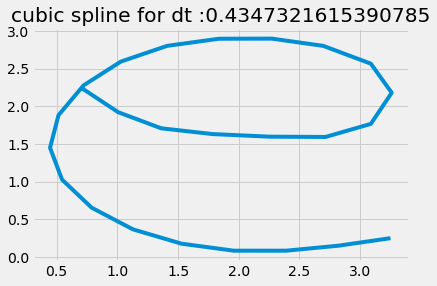

In [86]:
from scipy.interpolate import *
f1 = f2=CubicSpline(T,x_i, bc_type='natural')
f2=CubicSpline(T,y_i, bc_type='natural')
ts=np.linspace(0,T[-1],25)
plt.plot(f1(ts),f2(ts))
plt.title("cubic spline for dt :{}".format(ts[1]-ts[0]))

## ANS 4 (Least square code)

value of a :0.0060865596617836765
value of b :16.863974502679174


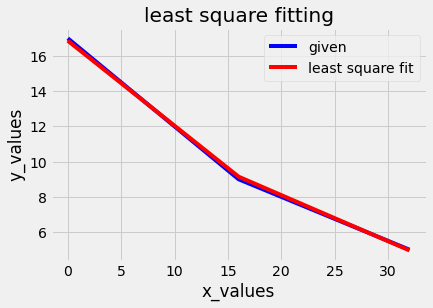

In [22]:
""" To perform least square method and find the value of a abd b from y=be^(-2piax) after linearising it using log trick
on both sides we get ln(y)=ln(b)-2piax 
let y1=ln(y) annd b1=ln(b) ,a1=-2piathen implementing least square technique to get b1 and a from whic we can get b and a 
minimizing error of y1=b1+a1x"""
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0,16,32])
y = np.array([17,9,5])
A = np.vstack([x, np.ones(len(x))]).T
a1, log_b = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
b = np.exp(log_b)
a=-a1/(2*np.pi)
print("value of a :{}".format(a))
print("value of b :{}".format(b))
# y fit data 
y_fit=b*np.e**(-2*np.pi*x*a)
# plotting the given data and least square fit 
plt.style.use('fivethirtyeight')
plt.plot(x,y,'b-')
plt.plot(x,y_fit,'r-')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title("least square fitting")
plt.legend(["given", "least square fit"], loc ="upper right")
plt.show()

**Non-linear least square fitting**

In [43]:
'''Non linear least square fit'''
import scipy.optimize 
t_data = np.array([0,16,32])
y_data = np.array([17,9,5])
def func_nl_lsq(x, t=t_data, y=y_data):
    return x[0]*np.exp(-2*np.pi*x[1]*t) -  y
    # removed one level of []'s
opt=scipy.optimize.least_squares(func_nl_lsq, [0, 0])
b1,a1=opt.x
print("value of a :{}".format(a1))
print("value of b :{}".format(b1))


value of a :0.0061838383988665315
value of b :16.969533501259885


In [44]:
'''Relative error for a and b using linerized least square method and non linear least square function '''
Rel_a= (a-a1)/a
Rel_b=(b-b1)/b
print("Relative error for a and b using linerized least square method and non linear least square function")
print("relative error for a : {}".format(Rel_a))
print("relative error for a : {}".format(Rel_b))
print("*******************************************")



Relative error for a and b using linerized least square method and non linear least square function
relative error for a : 0.0
relative error for a : 0.0
*******************************************
